## D

In [3]:
# Código feito por Dimas Germano Brandão Soares Silva
# Estudos e desafios feitos para Quarentena de dados  
# github: https://github.com/dimasgb7  
# linkedin: https://www.linkedin.com/in/dimas-silva-201393120/
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.mode.chained_assignment = None

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados_raw = pd.read_csv(uri)

In [4]:
colunas_pessoais = ['NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA','TP_SEXO','TP_COR_RACA','CO_ESCOLA','CO_UF_ESC']
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados_raw[colunas_de_notas]
dados_notas.columns = ['ciencia_natureza','ciencias_humanas','linguagem_codigos','matematica_tecnologias', 'redacao']
dados_notas.dropna(inplace=True)
print('Tamanho do sample de notas:',len(dados_notas))

Tamanho do sample de notas: 97270


In [5]:
dados_notas.query('ciencias_humanas < 1')

,ciencia_natureza,ciencias_humanas,linguagem_codigos,matematica_tecnologias,redacao
3824,413.6,0.0,464.7,490.4,480.0
5647,392.2,0.0,0.0,387.6,0.0
7514,504.4,0.0,570.5,583.7,560.0
7999,373.5,0.0,435.5,414.9,320.0
9500,394.1,0.0,0.0,457.4,360.0
...,...,...,...,...,...
129910,597.4,0.0,569.5,764.9,840.0
132027,421.2,0.0,0.0,390.3,0.0
136118,417.4,0.0,0.0,480.4,220.0
136388,481.7,0.0,0.0,484.9,340.0


In [6]:
dados_notas.corr()

,ciencia_natureza,ciencias_humanas,linguagem_codigos,matematica_tecnologias,redacao
ciencia_natureza,1.000000,0.571979,0.600252,0.579052,0.513206
ciencias_humanas,0.571979,1.000000,0.698270,0.529275,0.502914
linguagem_codigos,0.600252,0.698270,1.000000,0.565544,0.562957
matematica_tecnologias,0.579052,0.529275,0.565544,1.000000,0.483313
redacao,0.513206,0.502914,0.562957,0.483313,1.000000


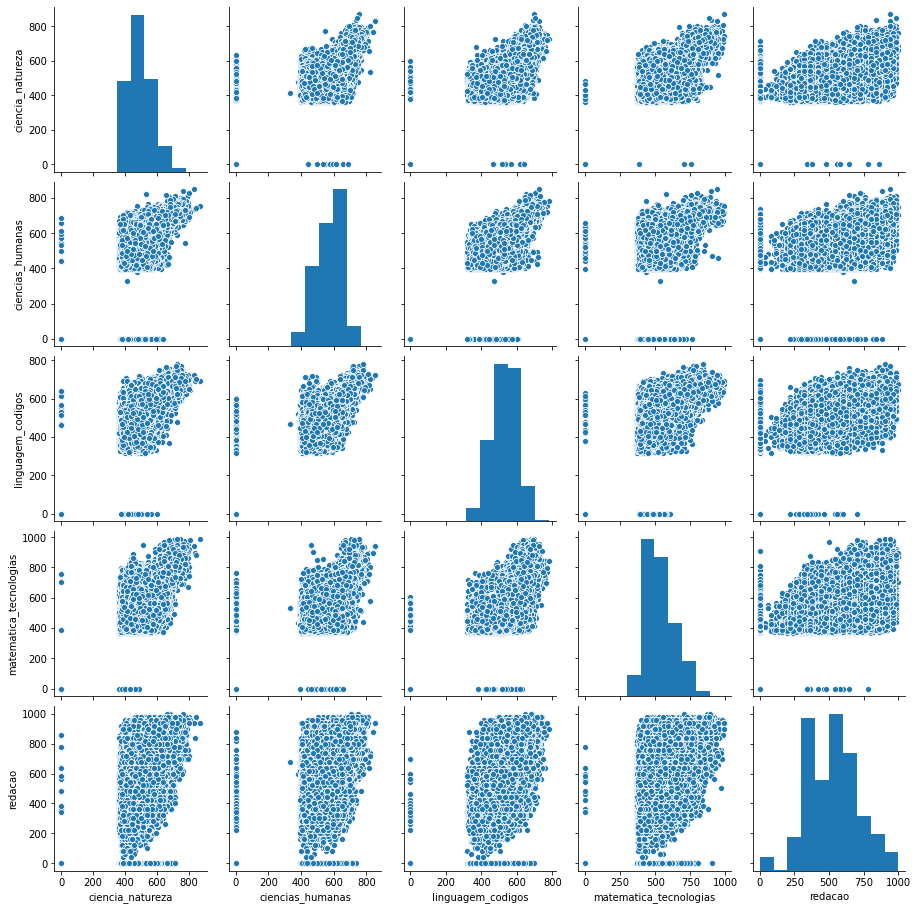

In [7]:

sns.pairplot(dados_notas)

In [8]:
x4_notas = dados_notas.drop(columns=['linguagem_codigos'])
y_adivinhar = dados_notas['linguagem_codigos']

In [9]:
x4_notas.head()

,ciencia_natureza,ciencias_humanas,matematica_tecnologias,redacao
1,523.1,671.3,738.0,680.0
2,409.2,531.7,438.1,600.0
3,452.3,505.5,544.9,400.0
6,428.5,505.2,436.8,560.0
8,491.8,575.7,487.6,660.0


In [12]:
from sklearn.model_selection import train_test_split


np.random.seed(43267)

# f(x) = y
x_treino, x_teste, y_treino, y_teste = train_test_split(x4_notas, y_adivinhar)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [14]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/home/dimas/sapientia_analytics/venvsapientia/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [15]:
predicoes_notas_linguagem = modelo.predict(x_teste)
predicoes_notas_linguagem[:5]

array([486.66331109, 540.37793322, 478.79488436, 452.0140805 ,
       533.06419739])

In [16]:
y_teste[:5]

41528    420.2
81918    545.6
22786    518.1
17935    539.2
70617    536.9
Name: linguagem_codigos, dtype: float64

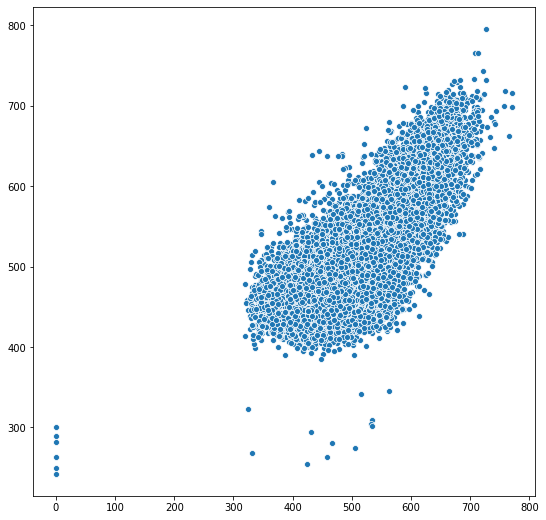

In [20]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values,y=predicoes_notas_linguagem)